In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Import the relevant libraries

### Compute Performance metrics from scra

In [2]:
df_a=pd.read_csv('5_a.csv')
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [3]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       10100 non-null  float64
 1   proba   10100 non-null  float64
dtypes: float64(2)
memory usage: 157.9 KB


In [4]:
df_a["y"].value_counts() # Count items for each y values

1.0    10000
0.0      100
Name: y, dtype: int64

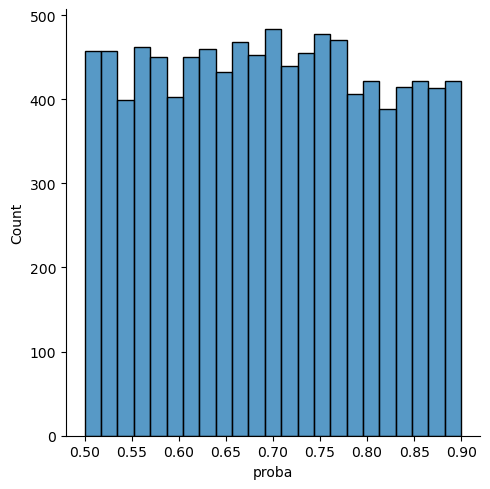

In [5]:
%matplotlib inline
sns.displot(df_a["proba"]); # Plot to see distribution of probabilities

In [6]:
df_a.proba = np.where(df_a.proba >= 0.50,1,'proba') # convert classes above 50 to 1


In [7]:
df_a["proba"].value_counts() # Count values of unique classes

1    10100
Name: proba, dtype: int64

It appears as if there are no values less than 50 % in the dataset. 

In [8]:
df_a.proba = df_a.proba.astype('float64') # Convert classes into floats

In [9]:
def get_ytrues_and_preds(df):
    
    '''Extract y_trues and predicts from the data frame
       returns a list of y_trues and predicts within lists'''
    
    ys = []
    predicts = []
    
    for row in range(df.shape[0]):
        y = df.iloc[row,:][0]
        pred = df.iloc[row,:][1]
        ys.append(y)
        predicts.append(pred)
        
    return ys, predicts
    

In [10]:

def true_positives(y,pred):
    
    """Takes a list of y trues and predictions
       Returns trues positives using those lists"""
    
    true_positives = 0
    for y_true, y_predict in zip(y,pred):
    
        if y_true == 1 and y_predict == 1:
            true_positives += 1
            
    return true_positives
            

def true_negative(y,pred):
    
    """Takes a list of y trues and predictions
       Returns trues negatives using those lists"""
    
    true_negatives = 0
    for y_true, y_predict in zip(y,pred):
        if y_true == 0 and y_predict == 0:
            true_negatives += 1
    return true_negatives
    
    
def false_positive(y,pred):
    
    """Takes a list of y trues and predictions
       Returns false positives using those lists"""
    
    false_positives = 0
    for y_true, y_predict in zip(y,pred):
        if y_true == 0 and y_predict == 1:
            false_positives += 1
    return false_positives


def false_negative(y,pred):
    
    """Takes a list of y trues and predictions
       Returns false negatives using those lists"""
    
    false_negatives = 0
    for y_true, y_predict in zip(y,pred):
        if y_true == 1 and y_predict == 0:
            false_negatives += 1
    return false_negatives
    
    
            

In [17]:
def confusion_matrix(df):
    
    '''Gets a dataframe and returns a confusion matrix'''
    
    matrix = []
    
    ys,predicts = get_ytrues_and_preds(df)
   
    true_pos_and_true_nega = [true_negative(ys,predicts),false_negative(ys,predicts)]
    false_pos_and_false_nega = [false_positive(ys,predicts),true_positives(ys,predicts)]
    matrix.append(true_pos_and_true_nega)
    matrix.append(false_pos_and_false_nega)
    
    return matrix


In [18]:
confusion_matrix(df_a)  # REVISIT THIS BEFORE SUBMISSION

[[0, 0], [100, 10000]]

In [19]:
def confusion_matrix_display(matrix):
    
    '''Gets an numpy array or matrix and returns a dataframe to display the matrix'''
    
    matrix = pd.DataFrame(np.array(matrix),
                          columns=["Actually Positive(1)","Actually Negative(0)"],
                          index= [" Predicted Positie(1)", "Predicted Negative(0)"])
    return matrix

    

In [20]:
confusion_matrix_display(confusion_matrix(df_a))

,Actually Positive(1),Actually Negative(0)
Predicted Positie(1),0,0
Predicted Negative(0),100,10000


## F1 Score

In [15]:
def precision(ys,preds):
    
    '''Calculates precision using y trues and predictions'''
    
    return (true_positives(ys,preds)) / (true_positives(ys,preds) + false_positive(ys,preds))


def recall(ys, preds):
    
    '''Calculates recall using y trues and predictions'''

    return (true_positives(ys,preds)) / (true_positives(ys,preds) + false_negative(ys,preds))


def f1_score(df):

    '''Calculates f1 score'''

    ys, preds = get_ytrues_and_preds(df)
    precision_ = precision(ys,preds)
    recall_ = recall(ys,preds)
    
    return (2 * precision_ * recall_) / (precision_ + recall_)

    
f1_score(df_a)
   

0.9950248756218906

## Accuracy

In [16]:
def accuracy(df):
    ys, preds = get_ytrues_and_preds(df)
    return (true_positives(ys,preds) + true_negative(ys,preds)) / ( true_positives(ys,preds) + true_negative(ys,preds) + false_positive(ys,preds) + false_negative(ys,preds)  )

accuracy(df_a)

0.9900990099009901

In [17]:
# Read the file again to get original  probabilities

df_a=pd.read_csv('5_a.csv')
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


## AUC Score

In [18]:
def true_positive_rate(ys,preds):
    '''Returns the true positive rate'''
    
    return (true_positives(ys,preds))/ (true_positives(ys,preds) + false_negative(ys,preds)) 


def false_positive_rate(ys,preds):
    '''Returns the false positive rate '''
    
    return (false_positive(ys,preds))/ (false_positive(ys,preds) + true_negative(ys,preds)) 


def auc_score(df):
    '''Given true positive and false rates at different thresholds
       It returns auc score'''
    
    true_pos_rate = []
    false_pos_rate = []
    
    sorted_df =df.sort_values(by='proba',ascending=False)
    thresholds = sorted_df['proba'].unique()
 
    for prob in thresholds:
        sorted_df['y_pred'] =  np.where(sorted_df['proba'] >= prob, 1, 0)
        true_pos_rate.append(true_positive_rate(sorted_df.y,sorted_df.y_pred))
        false_pos_rate.append(false_positive_rate(sorted_df.y,sorted_df.y_pred))
    
    return np.trapz(true_pos_rate,false_pos_rate)


auc_score(df_a)

0.48829900000000004

## Using a different dataset

In [19]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [20]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       10100 non-null  float64
 1   proba   10100 non-null  float64
dtypes: float64(2)
memory usage: 157.9 KB


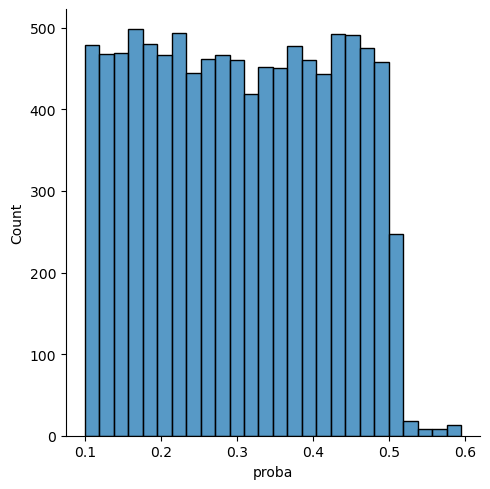

In [21]:

%matplotlib inline
sns.displot(df_b["proba"]); # Plot to see distribution of probabilities

In [22]:
df_a.proba = df_a.proba.astype('float64') # Convert classes into floats

In [23]:
df_b.proba = np.where(df_b["proba"] >= 0.50,1,0) # convert classes above 50 to 1
# df_b.proba = np.where(df_b.proba >= 0.50,0,'proba')


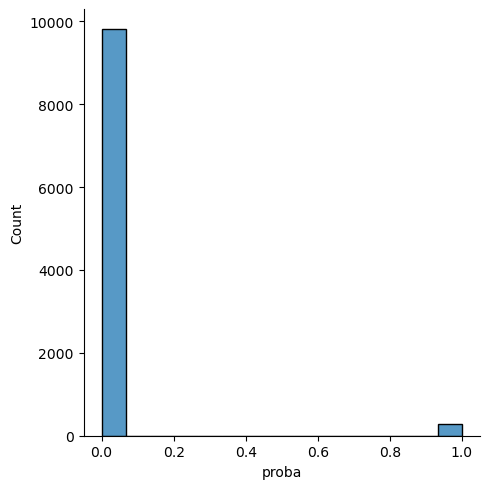

In [24]:
sns.displot(df_b["proba"]);


## Confusion Matrix

In [25]:
confusion_matrix_display(confusion_matrix(df_b))

,Actually Positive(1),Actually Negative(0)
Predicted Positie(1),55,9761
Predicted Negative(0),239,45


## F1 Score

In [26]:
f1_score(df_b)

0.2791878172588833

## Accuracy

In [27]:
accuracy(df_b)

0.9718811881188119

## AUC Score

In [28]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [29]:
auc_score(df_b)

0.9377570000000001

### Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric



In [30]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [31]:

def a_metric(y, probabilities, threshold):
    '''Find a metric using the formula above'''
 
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    min_a = float('inf')

    for i in range(len(probabilities)):
        if probabilities[i] >= threshold :
            if y[i] == 1:
                true_positive += 1
            else:
                false_positive += 1

        if probabilities[i] < threshold:
            if y[i] == 0:
                true_negative += 1
            else:
                false_negative += 1

    A = (500 * false_negative) + (100 * false_positive)

    return A

In [32]:

def minimized_a(y, probabilities,thresholds):
    '''Compute the best threshold'''
    min_a = float('inf')
    min_t = 0

    for threshold in thresholds:
        metric = a_metric(y, probabilities, threshold)
        if metric <= min_a:
            min_a = min(metric, min_a)
            min_t = threshold

    return min_a, min_t

In [33]:
thresholds = np.unique(df_c['prob'])
minimized_a(df_c.y,df_c.prob, thresholds)


(141000, 0.2300390278970873)


### Compute performance metrics(for regression) for the given data 5_d.csv


In [34]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


## Mean Squared Error

In [35]:
 # write your code for task 5d
    
def mean_squared_error(df):
    """Returns the average of squared errors"""
    
    sum_difference = 0

    for row in range(df.shape[0]):
        y = df.iloc[row,:][0]
        pred = df.iloc[row,:][1]
        
        squared_error = (pred - y)**2
        sum_difference += squared_error
    
    return sum_difference / df.shape[0]
        
mean_squared_error(df_d)       

177.16569974554707

## Mean Absolute Percentage Error

In [36]:
def mean_abs_percentage_error(y_true, y_pred):
    '''Returns the average percentage of absolute errors'''
    
    errors = []
    
    for y,pred in zip(y_true,y_pred):
        abs_error = np.abs(y - pred)
        errors.append(abs_error)
    mean_error = np.mean(errors)
    mean_y = np.mean(y_true)
    
    
    mape =(mean_error / mean_y)* 100
    return mape

In [37]:
ys, preds = get_ytrues_and_preds(df_d)
mean_abs_percentage_error(ys,preds)

12.91202994009687

## Coefficient of Determination

In [38]:
def r2(df):
    '''Returns the cofficient of determination'''
    ys, preds = get_ytrues_and_preds(df)
    
    mean_true_value = np.mean(ys)
    numerator = 0
    denominator = 0

     # loop over all true and predicted values
    for yt, yp in zip(ys, preds):
        numerator += (yt - yp) ** 2
        denominator += (yt - mean_true_value) ** 2
     
    ratio = numerator / denominator
     
    return 1 - ratio
r2(df_d)

0.9563582786990964